In [43]:
%matplotlib inline
import os
import sys

import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr


from IPython import display

In [198]:
def rundir():
    return os.path.join('/chia_cluster/home/jackyu',
             'radiation/crd/LW/examples',
             'separate_g_groups',
             'study__lblnew_g1_threshold',
             'h2o',
             'band01_wn_20_340',
             'nv_50',
             'dv_0.02',
             'ng_10',
             'g_ascending_k_descending',
             'refPTs_P_1_T_250__P_30_T_250__P_300_T_250',
             'ng_refs_3__2__5',
             'getabsth_auto__auto__auto',
             'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
             'wgt_0.3_0.3_0.3__0.3_0.3__0.3_0.6_0.6_0.6_0.6',
             'wgt_flux_2',
             'wgt_k_1',
             'klin_none',
             'w_diffuse_1.6_1.8_1.8__1.8_1.7__1.6_1.4_1.4_1.7_1.8',
             'crd_ktable1',
             'atmpro_mls')

def getfpath_bv_atm():
    return os.path.join(rundir(), 'bv_atm.dat')


def getfpath_bg_atm():
    return os.path.join(rundir(), 'bg_atm.dat')


def load_bv_atm():
    df = pd.read_csv(getfpath_bv_atm(),
                     sep=r'\s+')
    
    df = df.set_index(['k', 'v'])
    ds = xr.Dataset.from_dataframe(df)
    return ds


def load_bg_atm():
    df = pd.read_csv(getfpath_bg_atm(),
                     sep=r'\s+')

    df = df.set_index(['k', 'g'])
    ds = xr.Dataset.from_dataframe(df)
    return ds



def display_prolem_bg_atm():
    df = BG_ATM.to_dataframe()
    srs = pd.to_numeric(df['bg_atm'], errors='coerce')
    pd.set_option('display.max_rows', None)
    display.display(df[srs.isnull()])
    pd.reset_option('display.max_rows')


def problem_gipts():
    df = BG_ATM.to_dataframe()
    srs = pd.to_numeric(df['bg_atm'], errors='coerce')
    return srs[srs.isnull()].index.values


def plt_bv_at_ipt(ds_bv_atm, ipt):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ds_bv_atm['bv_atm'].sel(k=ipt)\
    .to_dataframe().drop('k', axis=1).plot(ax=ax)
    return fig
    
    
def describe_bv_at_ipt(ds_bv_atm, ipt):
    display.display(ds_bv_atm['bv_atm'].sel(k=ipt)\
    .to_dataframe().drop('k', axis=1).describe())

    
def plt_bv_atm_at_random_problem_gipt():
    gipt = np.random.choice(problem_gipts())
    g, ipt = gipt
    
    df_bg_atm = BG_ATM.to_dataframe()
    bg_atm = df_bg_atm.loc[gipt].values[0]
    print()
    
    df = BV_ATM.sel(k=ipt).to_dataframe().drop('k', axis=1)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    df.plot(ax=ax)
    ax.set_ylabel('B(v)')
    ax.set_xlabel('v ($cm^{-1}$)')
    ax.set_title(
        'B(v, ipt={ipt}).  B(g={g}, ipt={ipt}) = {v}'\
        .format(**{'g': g, 'ipt': ipt, 'v': bg_atm}))
    display.display(fig)
    plt.close()
    
    
def script():
    
    display.display(
    display.Markdown("### B(v) at (p,t) at which B(g, (p, t)) is problematic."))
    for _ in range(30):
        plt_bv_atm_at_random_problem_gipt()
        
        
        

In [100]:
BG_ATM = load_bg_atm()

In [35]:
BV_ATM = load_bv_atm()

### B(v) at (p,t) at which B(g, (p, t)) is problematic.

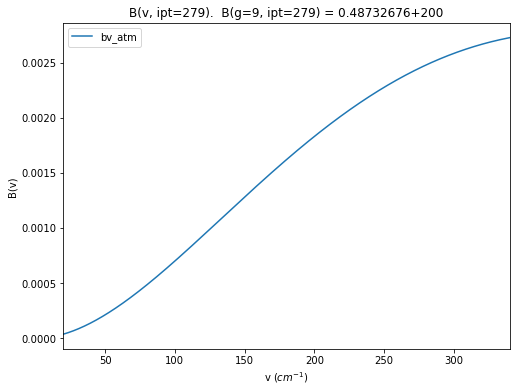

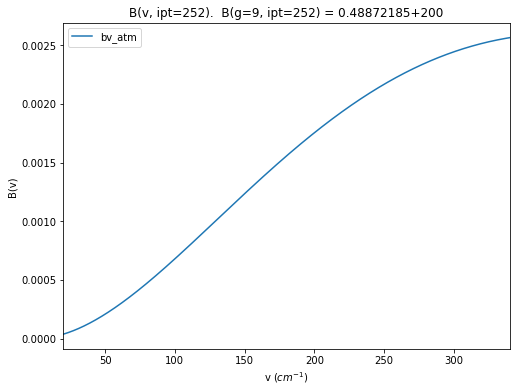

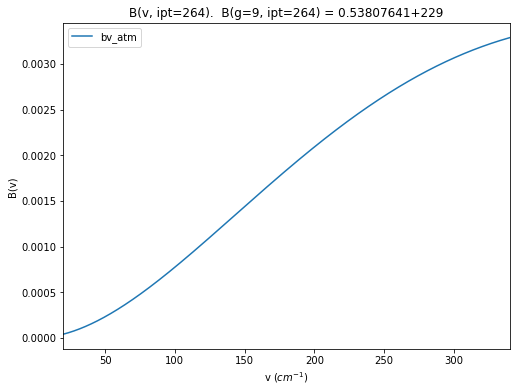

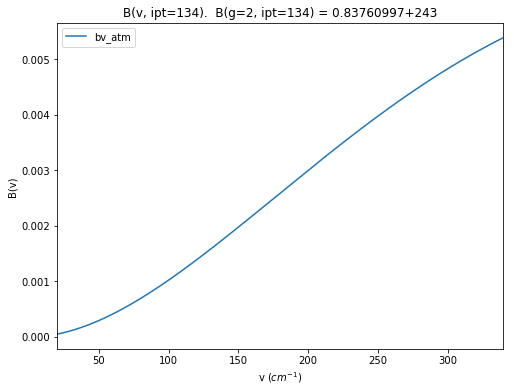

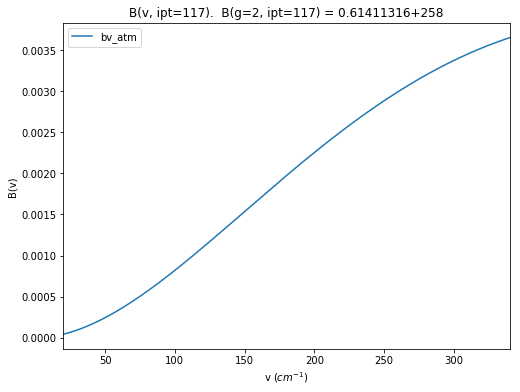

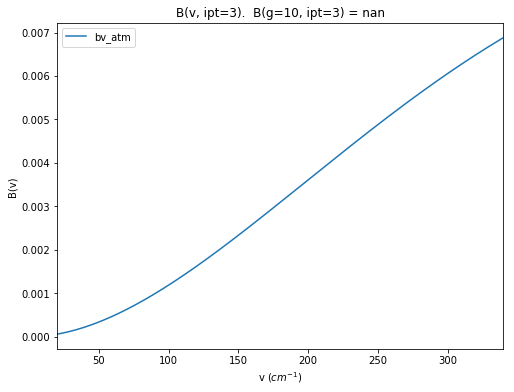

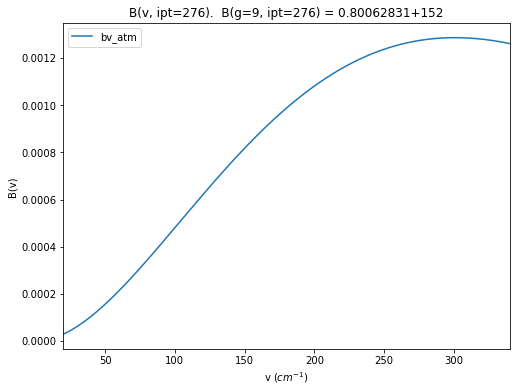

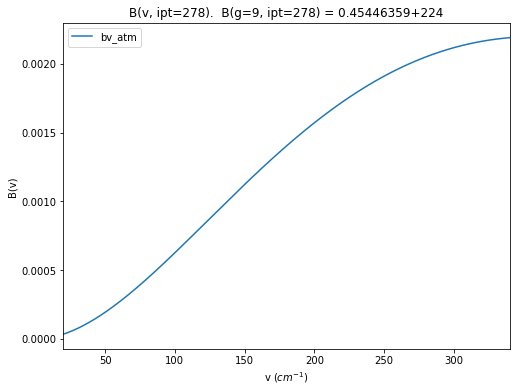

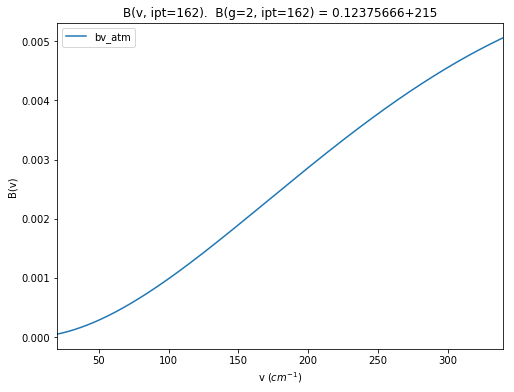

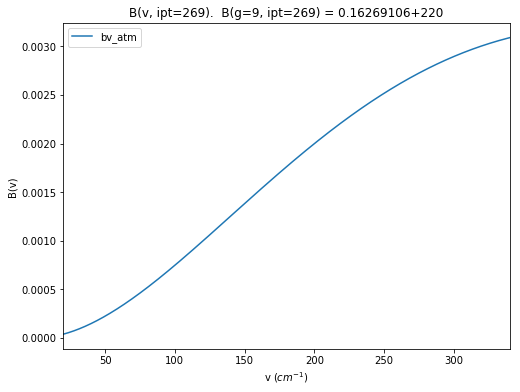

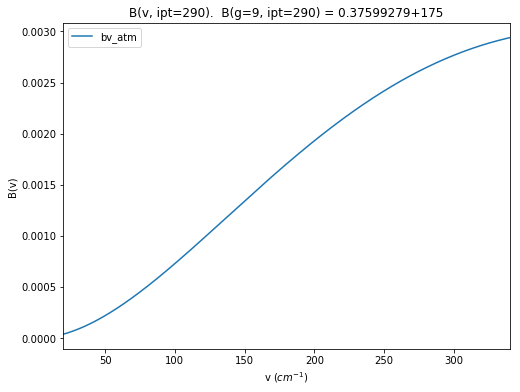

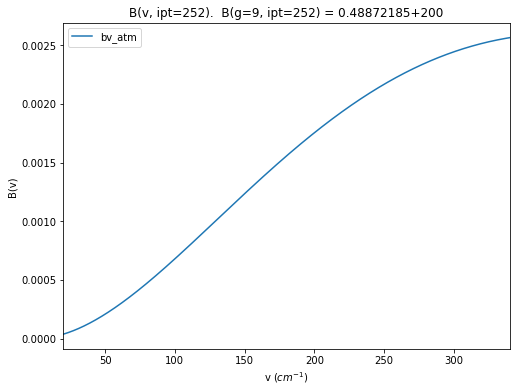

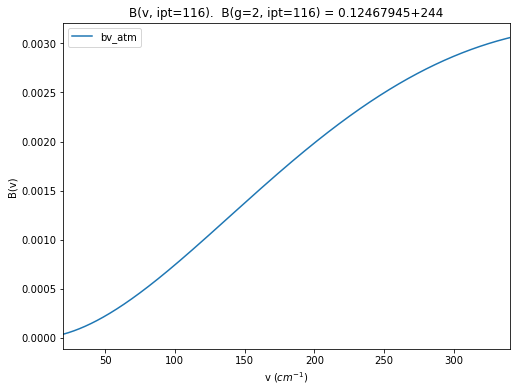

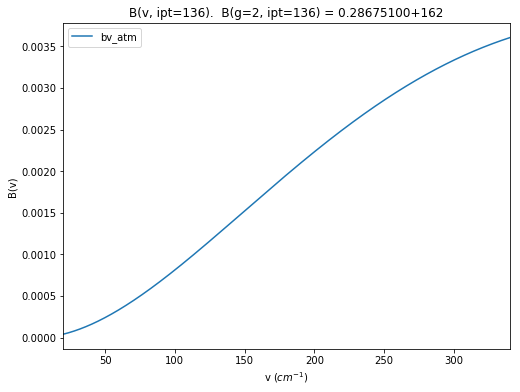

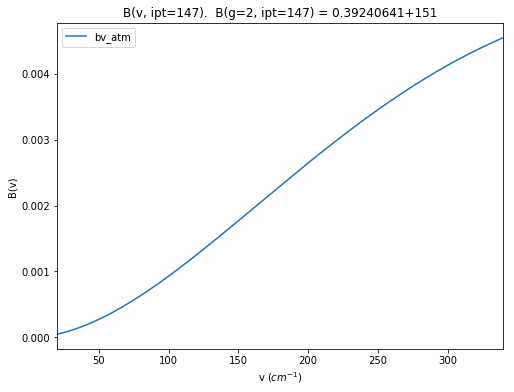

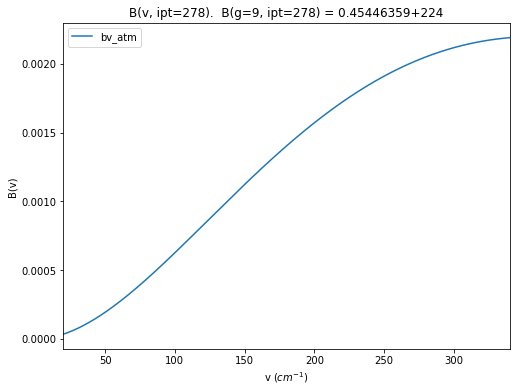

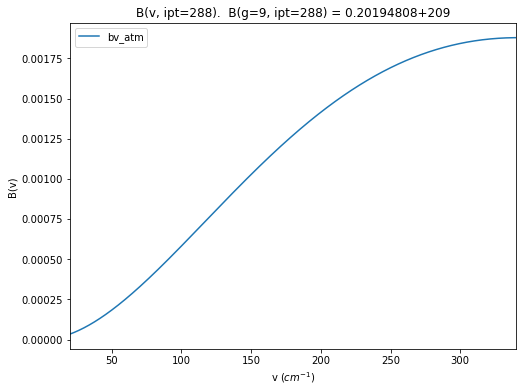

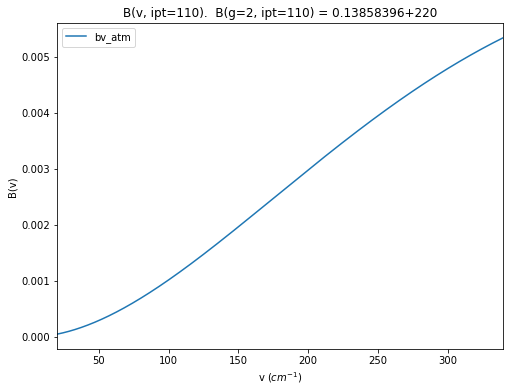

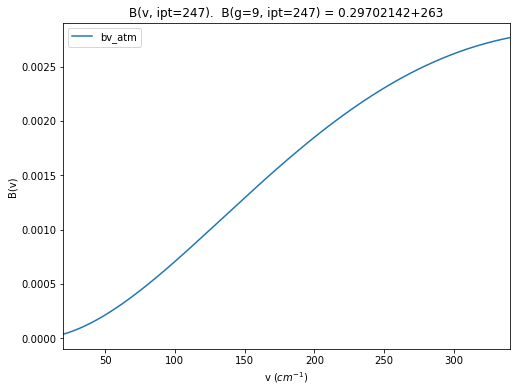

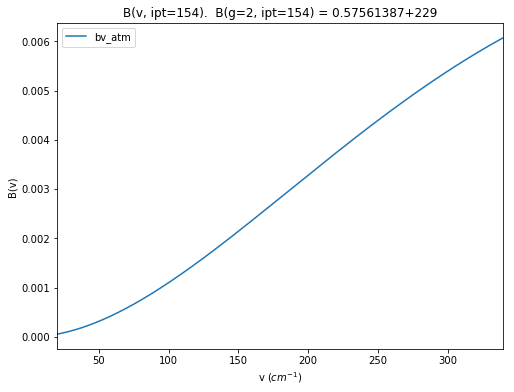

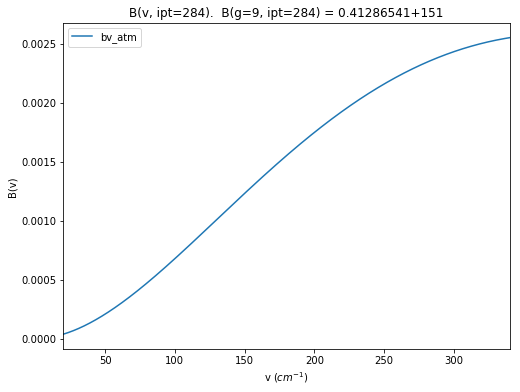

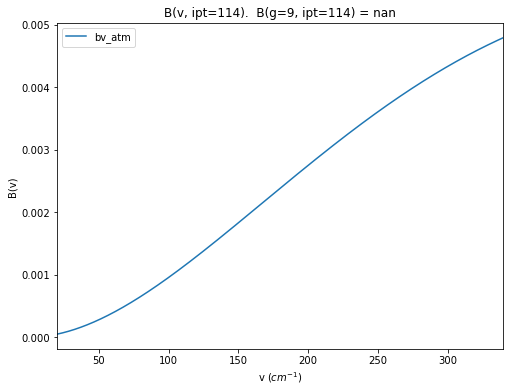

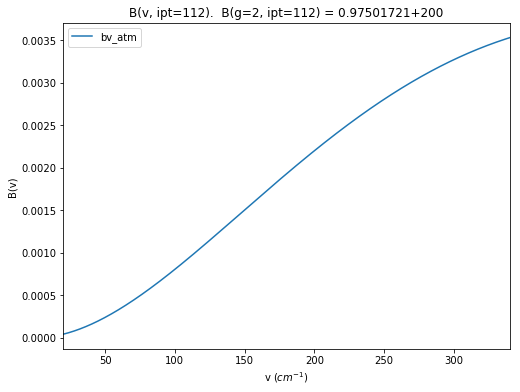

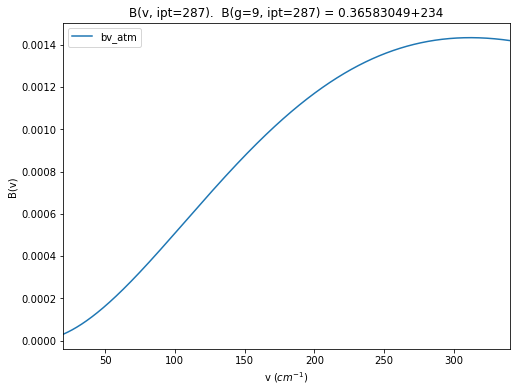

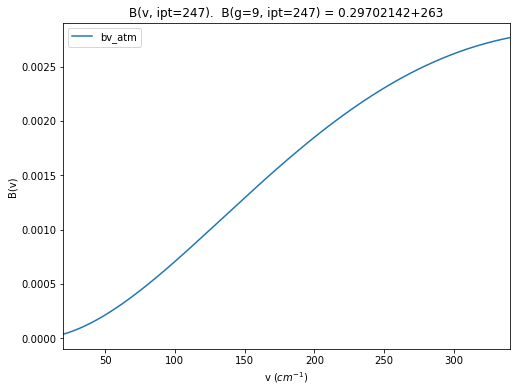

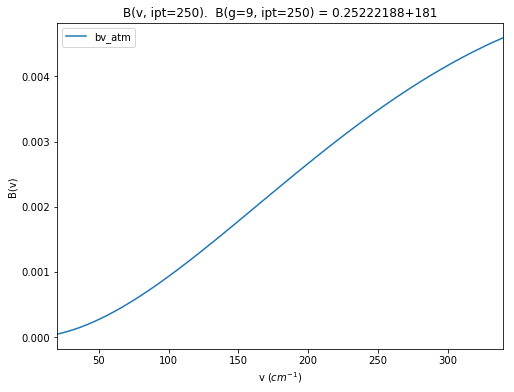

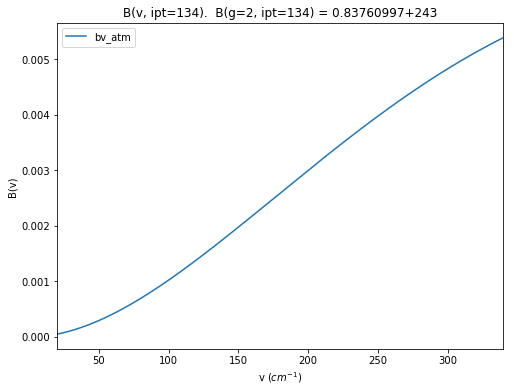

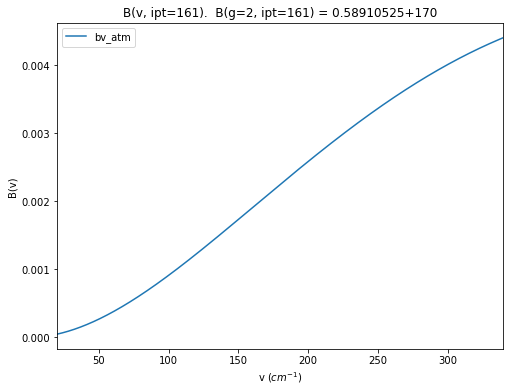

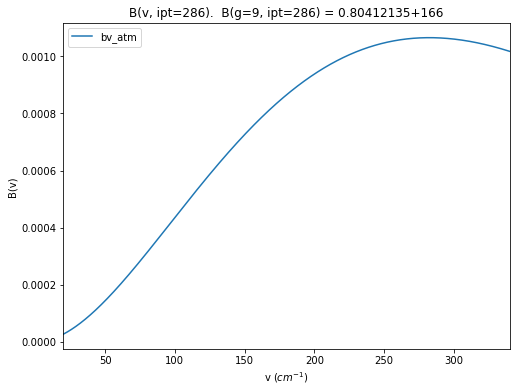

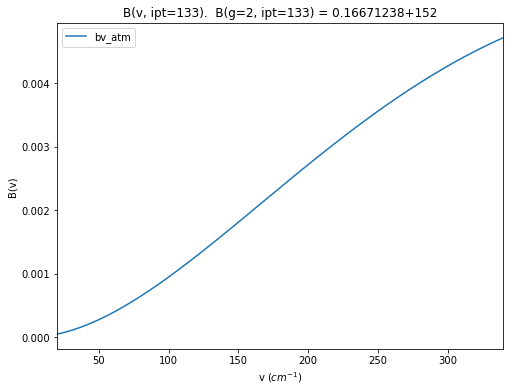

In [199]:
script()

In [201]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
